In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [2]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/245.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.877074,0.002512,-0.498873,0.021773,3.712534,0.027340,0.963221
1,0.964265,0.751198,0.011800,0.005349,3.496338,0.024371,1.212184
2,0.874754,0.028342,-0.504228,0.017111,3.665345,0.026932,0.992669
3,0.914671,0.773427,-0.203707,0.025697,3.409240,0.026174,1.050952
4,0.880268,0.051960,-0.506705,0.012188,3.694908,0.026145,1.053322
...,...,...,...,...,...,...,...
2995,0.108096,0.652071,0.480143,0.002435,1.873866,0.048000,2.000291
2996,0.104361,0.673716,0.434502,0.015476,1.869314,0.048000,1.991083
2997,0.101933,0.686319,0.418833,-0.018853,1.875860,0.048000,1.983671
2998,0.074017,0.723024,0.273767,-0.004064,1.787103,0.048000,1.840382


<Axes: xlabel='x', ylabel='y'>

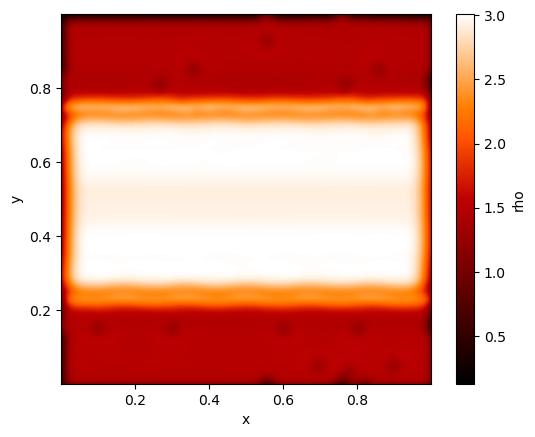

In [3]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [4]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdft

,x,y,vx,vy,u,h,rho
0,0.751272,0.004682,-0.488412,-0.013411,3.764993,0.027054,0.983693
1,0.969804,0.759763,-0.012163,-0.169836,3.198550,0.026014,1.063909
2,0.749141,0.029035,-0.476163,-0.003593,3.741638,0.026519,1.023818
3,0.874174,0.776467,-0.036886,-0.093110,3.385157,0.026275,1.042897
4,0.752520,0.051724,-0.472950,-0.000470,3.719924,0.026013,1.064029
...,...,...,...,...,...,...,...
2995,0.226743,0.651857,0.454774,-0.005963,1.867737,0.048000,1.991429
2996,0.207347,0.677538,0.383291,-0.022264,1.858364,0.048000,1.975903
2997,0.200931,0.684699,0.368894,-0.023005,1.866066,0.048000,1.967558
2998,0.137534,0.732937,0.220248,0.005837,1.755632,0.048000,1.798682


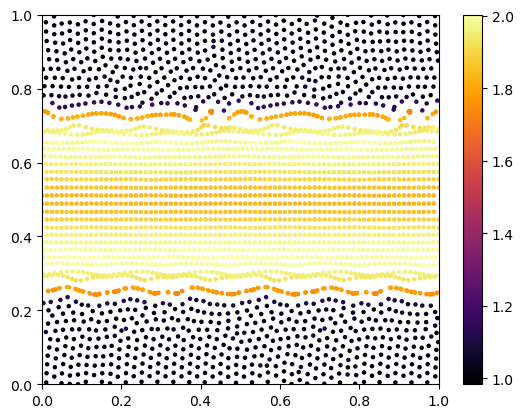

In [5]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 500
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

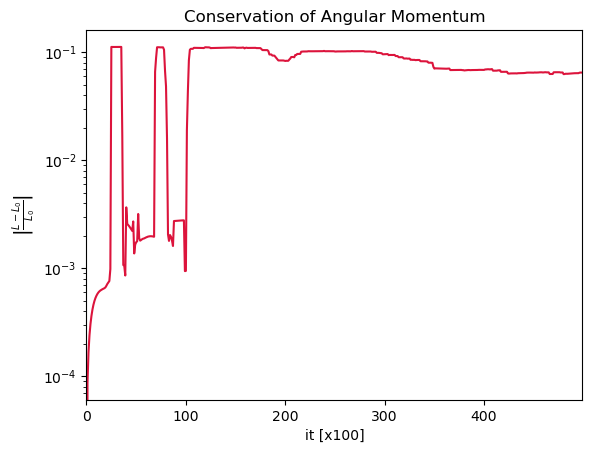

In [9]:
plt.plot(time[:], np.abs((ang_mom[:]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T-1)
plt.yscale("log")
plt.show()

# Conservation of Energy

In [10]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [11]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

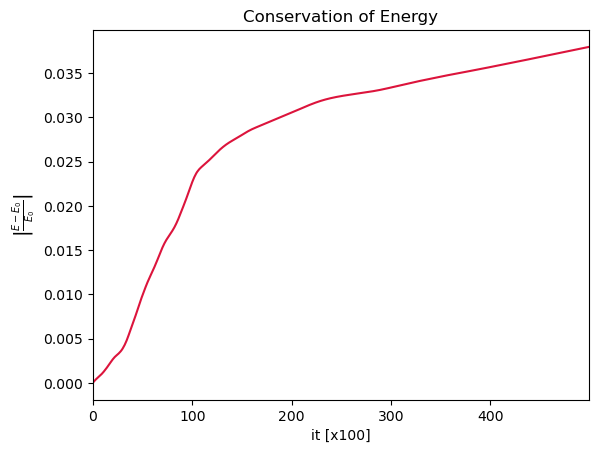

In [12]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()